In [17]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [18]:
# Load the dataset
file_path = '/content/stock_data.csv'  # Update the file path if necessary
stock_data = pd.read_csv(file_path)

In [19]:
# Display the first few rows to understand the structure
print(stock_data.head())


         Date        Open        High         Low       Close  Volume
0  2024-01-01  351.949281  483.615782  462.037159  395.720642   16115
1  2024-01-02  346.182519  275.020934  487.727355  464.805495   28933
2  2024-01-03  354.081553  247.607139  354.354190  312.066656    4320
3  2024-01-04  499.563617  408.710096  279.817282  446.952441   41380
4  2024-01-05  410.160460  198.047225  266.921714  395.556332   41334


In [20]:


# Check for missing values and data types
print(stock_data.info())
print(stock_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.1+ KB
None
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [21]:

# Convert the 'Date' column to datetime if it isn't already
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Sort the data by date
stock_data = stock_data.sort_values('Date')


In [22]:
# Basic descriptive statistics
print(stock_data.describe())



                      Date        Open        High         Low       Close  \
count                   20   20.000000   20.000000   20.000000   20.000000   
mean   2024-01-10 12:00:00  322.839849  330.446380  280.018551  321.912840   
min    2024-01-01 00:00:00  120.564255  139.082904  111.221199  125.451026   
25%    2024-01-05 18:00:00  221.028595  249.132743  199.270918  264.548486   
50%    2024-01-10 12:00:00  353.015417  321.974636  260.315748  317.525141   
75%    2024-01-15 06:00:00  404.776797  410.440921  354.927573  399.777900   
max    2024-01-20 00:00:00  499.563617  495.907554  492.137634  464.805495   
std                    NaN  115.730709  110.804105  112.670779   97.040764   

             Volume  
count     20.000000  
mean   31238.500000  
min     2997.000000  
25%    18635.750000  
50%    35909.500000  
75%    43951.000000  
max    49633.000000  
std    15917.557974  


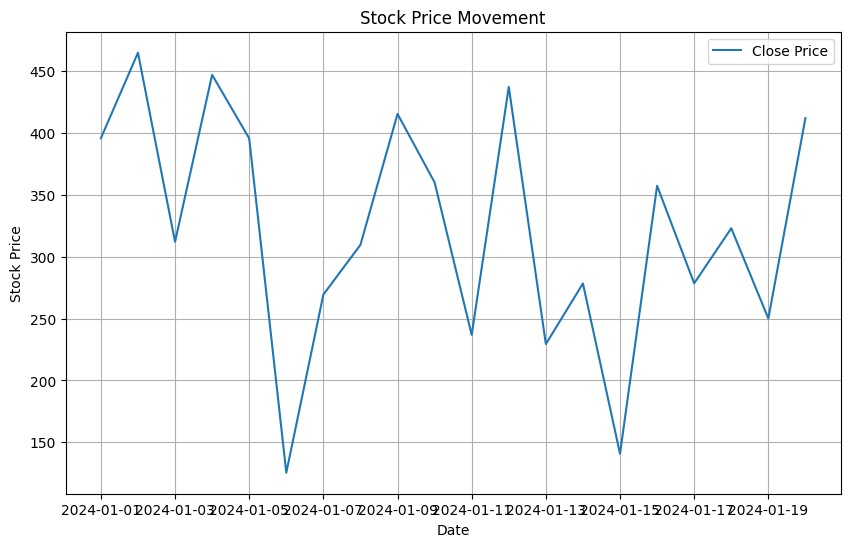

In [23]:

# Plot the closing price over time
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
plt.title('Stock Price Movement')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.legend()
plt.show()

In [24]:
# Calculate daily returns
stock_data['Daily Return'] = stock_data['Close'].pct_change()


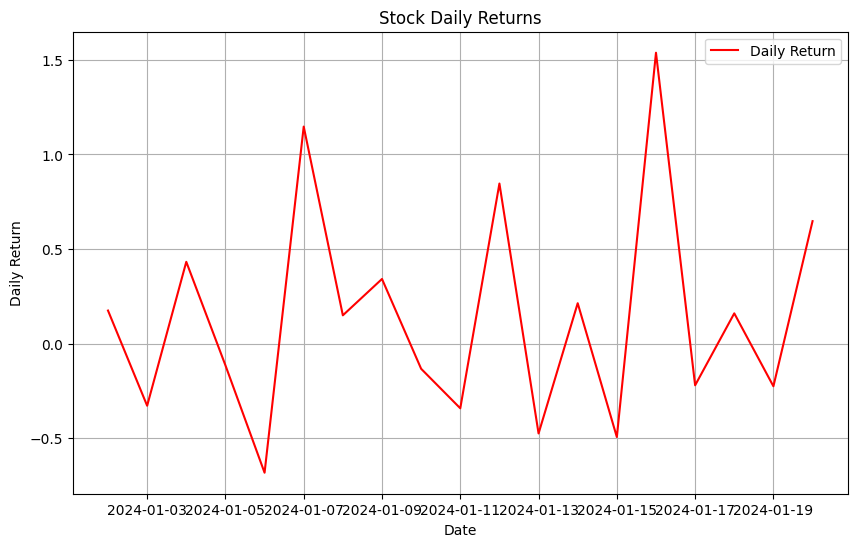

In [25]:
# Plot daily returns
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Date'], stock_data['Daily Return'], label='Daily Return', color='red')
plt.title('Stock Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.legend()
plt.show()


In [26]:
# Calculate and plot moving averages (e.g., 50-day and 200-day moving averages)
stock_data['50 Day MA'] = stock_data['Close'].rolling(window=50).mean()
stock_data['200 Day MA'] = stock_data['Close'].rolling(window=200).mean()


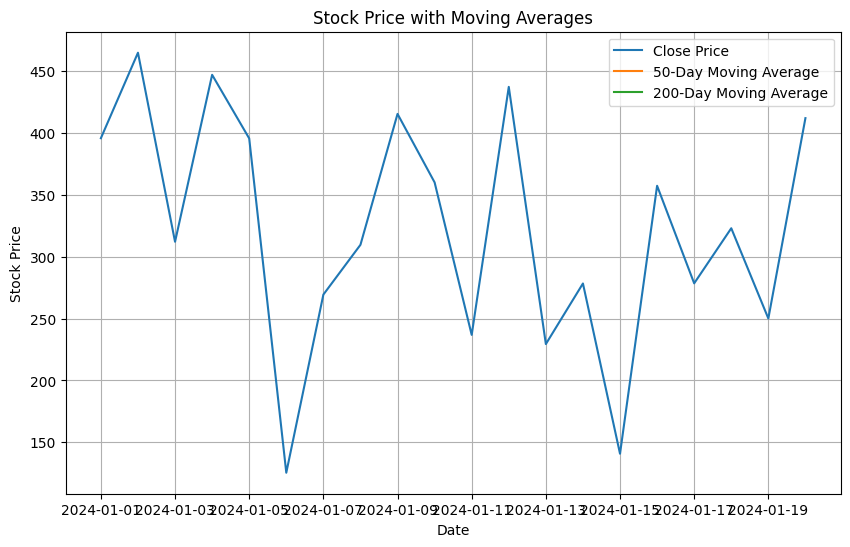

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
plt.plot(stock_data['Date'], stock_data['50 Day MA'], label='50-Day Moving Average')
plt.plot(stock_data['Date'], stock_data['200 Day MA'], label='200-Day Moving Average')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.legend()
plt.show()

In [28]:


# Volatility Analysis (Standard deviation of daily returns)
volatility = stock_data['Daily Return'].std()
print(f"Volatility (Standard Deviation of Daily Returns): {volatility}")


Volatility (Standard Deviation of Daily Returns): 0.585530361840776


In [31]:
if 'Date' in stock_data.columns:
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    stock_data.sort_values('Date', inplace=True)  # Ensure data is sorted by date
    stock_data.set_index('Date', inplace=True)
    print("\nData after setting 'Date' as index:")
    print(stock_data.head())


Data after setting 'Date' as index:
                  Open        High         Low       Close  Volume  \
Date                                                                 
2024-01-01  351.949281  483.615782  462.037159  395.720642   16115   
2024-01-02  346.182519  275.020934  487.727355  464.805495   28933   
2024-01-03  354.081553  247.607139  354.354190  312.066656    4320   
2024-01-04  499.563617  408.710096  279.817282  446.952441   41380   
2024-01-05  410.160460  198.047225  266.921714  395.556332   41334   

            Daily Return  50 Day MA  200 Day MA  
Date                                             
2024-01-01           NaN        NaN         NaN  
2024-01-02      0.174580        NaN         NaN  
2024-01-03     -0.328608        NaN         NaN  
2024-01-04      0.432234        NaN         NaN  
2024-01-05     -0.114992        NaN         NaN  


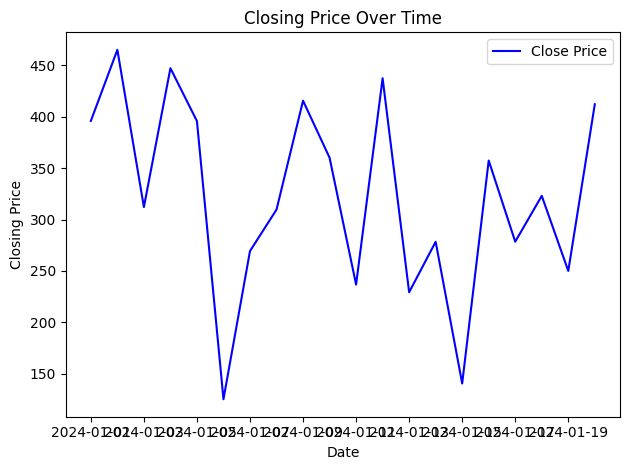

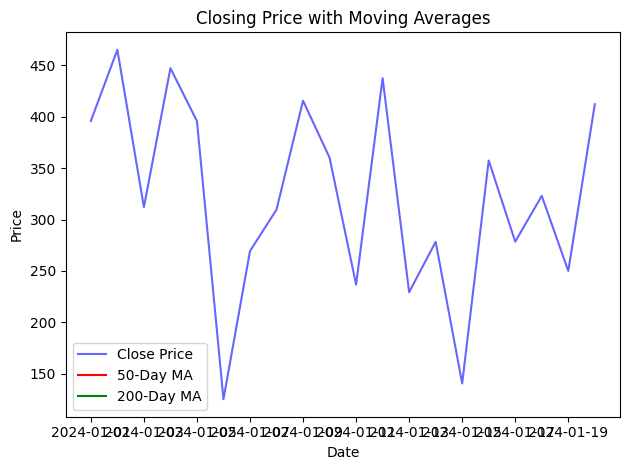

In [32]:
if 'Close' in stock_data.columns:
    plt.figure()
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')
    plt.title('Closing Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Calculate and plot moving averages (e.g., 50-day and 200-day)
    stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()
    stock_data['MA200'] = stock_data['Close'].rolling(window=200).mean()

    plt.figure()
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue', alpha=0.6)
    plt.plot(stock_data.index, stock_data['MA50'], label='50-Day MA', color='red')
    plt.plot(stock_data.index, stock_data['MA200'], label='200-Day MA', color='green')
    plt.title('Closing Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.tight_layout()
    plt.show()

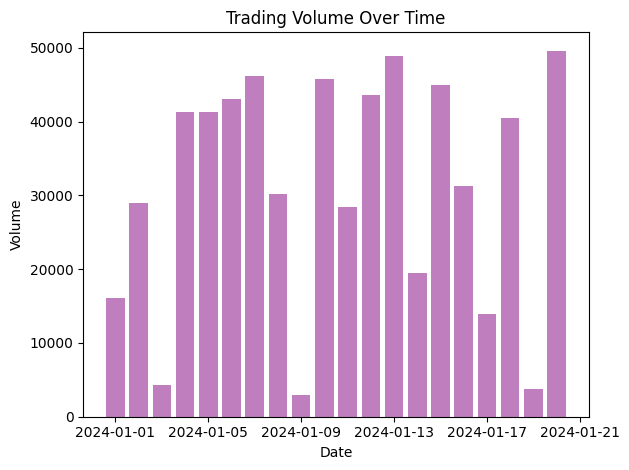

In [33]:
if 'Volume' in stock_data.columns:
    plt.figure()
    plt.bar(stock_data.index, stock_data['Volume'], color='purple', alpha=0.5)
    plt.title('Trading Volume Over Time')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.tight_layout()
    plt.show()

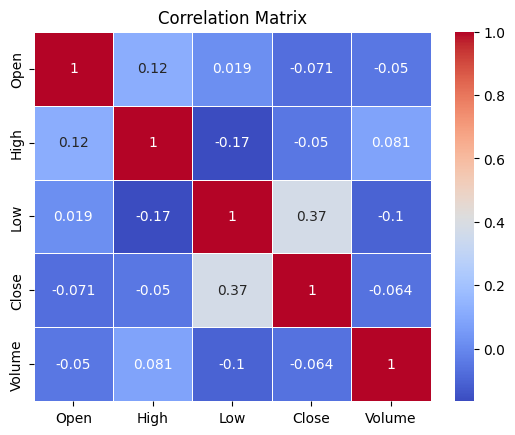

In [29]:

# Correlation matrix (if there are multiple columns like 'Open', 'High', 'Low', etc.)
correlation_matrix = stock_data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Optional: Save the analysis to a new CSV file
stock_data.to_csv('stock_data_analysis.csv', index=False)